# Monte Carlo 

## Recap

In this lesson I'm breaking the recap into two sections:
- foundational programming skills
    * basic mathematical operations, comparison operators
    * iteration and recursion with loop control structures `for` and `while`
    * keeping track of variables outside of loops (i.e., counting and summing)
    * function definition and using functions *inside* of loops
    * conditionals: `if`, `else`, and `elif`
    * types: `int`, `float`, `string`, `bool`
    * containers such as `list` and `dict`
    * randm number generation
    * accessing and iterating over elements in lists and dicts
    * file I/O
    * DEBUGGING!
    * algorithmic thinking
- applications
    * basic (and semi-advanced) data visualization: histograms, scatter plots, higher-dimensions in 2-d
    * fitting models to data and extracting results (with uncertainties)
    * text analysis, asking questions with unstructured data
    * simulating the solutions to ordinary differential equations, Euler Algorithm

Yowza!  For those continuing on the physics major or minor, it's worth noting that familiarity with the *foundational skills* will be assumed in future courses.  Some of the applications will be reinforced in future classes.

***

## Motivation

Next we'll explore a class of techniques referred to as "Monte Carlo" (MC).  Before we talk about what MC *is*, let's look at a few examples of how MC is used to generate knowledge.

- The MC approach was largely developed during the so-called Manhattan Project, the US military development of nuclear weapons during World War II.  Here is a nice article about how MC was implemented to simulate the transport of neutrons through matter: Kristina Panos. [FERMIAC](https://hackaday.com/2015/09/11/fermiac-the-computer-that-advanced-the-manhattan-project/)
- Daniel Fylstra. [*MONTE CARLO METHODS THAT LED TO THE ATOMIC BOMB MAY BE YOUR BEST BET FOR BUSINESS DECISION-MAKING*](https://www.solver.com/press/monte-carlo-methods-led-atomic-bomb-may-be-your-best-bet-business-decision-making).  Note: I did not read this article, and I do not endorse all-caps article titles.
- Adam Conrad. [Actuarial Application of Monte Carlo Simulation](https://www.slideshare.net/AdamConrad2/actuarial-application-of-monte-carlo-simulation-46703744) Might sound like a snoozer, but some really cool examples.
- Hlynur Davíð Hlynsson. [Monte-Carlo Search for Magic: The Gathering](https://towardsdatascience.com/monte-carlo-search-for-magic-the-gathering-6ca60750fcc6)
- From the world of finance: Kushal Agarwal. [The Monte Carlo Simulation: Understanding the Basics](https://www.investopedia.com/articles/investing/112514/monte-carlo-simulation-basics.asp)
- The Team Band. [Blaseball](https://blaseball.com/landing)
- Bay 12 Games. [Drawf Fortress](http://www.bay12games.com/dwarves/)

What feature(s) unite these applications? 

[Instructor pauses for you to think...]

Monte Carlo is applied in each because the complexity or scale of the system being studied prevents us from ***knowing exactly*** what the outcomes will be.  In some of these cases, there is a probabilistic nature to how the system operates.  Monte Carlo allows us to *sample* the possible behaviors of the system and form a statistical understanding of the possible outcomes.

***

## What is Monte Carlo?

The Monte Carlo Casino is a famous gambling and entertainment establishment (*i.e.*, a casino) located in the country of Monaco.  It is *very* fancy -- so fancy, in fact, that James Bond has been there in **two** separate films.

Ok, thanks for coming by!  Have a great week.

***

## What is the Monte Carlo technique?

The Monte Carlo method is a paradigm (or type of approach) to solving problems.  Like most things, the [Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method) entry is very good if you already know what Monte Carlo is:

> Monte Carlo methods... are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle. They are often used in physical and mathematical problems and are most useful when it is difficult or impossible to use other approaches. Monte Carlo methods are mainly used in three problem classes: optimization, numerical integration, and generating draws from a probability distribution.

Put simply, Monte Carlo is a way of studying systems or processes that are too complex, or are inherently non-deterministic, to provide definitive predictions.  A Monte Carlo analysis builds a statistical model of the behavior of a system, performs *many* simulations/trials of the system, and then generates a statistical understanding of the outcomes of the model.  

MC isn't *a* technique so much as it is a way of approaching certain types of problems.

Believe it or not, many of you have already applied the MC technique back when we introduced the concept of and syntax for random number generation.  Many MC techniques rely on random number generation to sample the possible states or behaviors of a system.

Let's look at a two examples of how we can use the MC approach to generate results.

***

## *De rigueur* example: Calculating $\pi$ using the MC method

Recall that the number $\pi$ is defined as the ratio of a circle's circumference to its diameter (in a flat space with Euclidean metric...).  $\pi$ is WILD! It is a transcendental number; *i.e.*, it's not the root of a finite polynomial with rational coefficients, and it can't be expressed as a fraction.  It pops up in many unexpected places in the mathematical and physical sciences!  We previously approximated $\pi$ using several interesting infinite series.

Let's imagine a world where we don't know the numerical value of $\pi$.  How would we go about *measuring* it?  We could make many, many, many circles, measure their diameters and circumferences, calculate the ratio for each, and perhaps average or fit... But it's probably unfeasible to carefully fabricate many very precise circles.

Here is another way to measure (or approximate) the value of $\pi$.  Recall that the area of a circle with unit radius is $\pi (1)^2 = \pi$.  Let's picture a circle with radius $1$ drawn inside a square with side length $2$, both centered at the origin in the $x$-$y$ plane.  We'll let the square occupy the region with $x\in [-1, 1]$ and $y\in[-1, 1]$.  Your instructor will draw this figure on the board, or you can scroll down to the visualization below.

Now imagine throwing $N$ darts at this figure in such a way that each dart lands with a random $(x, y)$ position somewhere inside the square.  Some number of these darts, $N_c$, will land inside the circle.  If the $(x, y)$ positions of the darts are truly randomly distributed inside the square, we expect that the probability of a dart landing in the circle, $p_c$, is equal to the fraction of the total area that is inside the circle:

\begin{equation} 
  p_c = \frac{A_c}{A} = \frac{\pi}{2^2} = \frac{\pi}{4} 
\end{equation}

It is important to note that if we don't know a value for $\pi$, **this probability is unknown to us**.  We can't calculate it from other quantities; rather, we need some way to measure it!  This is a feature common to many MC applications -- there is some important probability (or probability distribution) that we don't know, but that we want to know.

We will "measure" this probability by **sampling**!  (Note: We are going to do this with code, but you could totally do the same approximation with real darts on a real [not-college-owned] wall.)  We will randomly generate $N$ positions in the square, observe how many of these ($N_c$) fall within the circle, and then approximate

\begin{equation}
  p_c = \frac{\pi}{4} \approx \frac{N_c}{N} \implies \pi \approx 4\frac{N_c}{N}
\end{equation}

It's important to note that this approximation is APPROXIMATE!  Since $\pi$ is transcendental, it cannot be expressed as a fraction, and thus there are NO values of $N_c$ and $N$ that will make the equality perfect.  However, the more we sample (the larger $N$ is), the better (on average) our approximate should be.

Here's a little animation so that we're on the same page:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

xs, ys = [], []
for i in range(100):
    xs.append(2* np.random.rand() - 1)
    ys.append(2* np.random.rand() - 1)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 1), ylim=(-1, 1))
ax.set_aspect('equal')
circle1 = plt.Circle((0, 0), 1.0, color='orange', alpha=0.3)
plt.gca().add_patch(circle1)
thisx, thisy = xs, ys
scat, = ax.plot(thisx, thisy, 'o')

def animate(i):
    thisx = xs[0:i+1]
    thisy = ys[0:i+1]
    scat.set_data(thisx, thisy)
    return scat,

ani = animation.FuncAnimation(fig, animate, frames=99, interval=100)
# ani.save('pi.mp4') # you can uncomment this line to produce a short movie of the process!
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

All we need now is some way to determine whether a random $(x, y)$ point is inside the circle.  Hmmmm.

Let's code it up!

After 10000 samples our approximation of π is 3.1384
After 20000 samples our approximation of π is 3.136
After 30000 samples our approximation of π is 3.1337333333333333
After 40000 samples our approximation of π is 3.1352
After 50000 samples our approximation of π is 3.13552
After 60000 samples our approximation of π is 3.1398
After 70000 samples our approximation of π is 3.136685714285714
After 80000 samples our approximation of π is 3.1369
After 90000 samples our approximation of π is 3.138933333333333
After 100000 samples our approximation of π is 3.13864


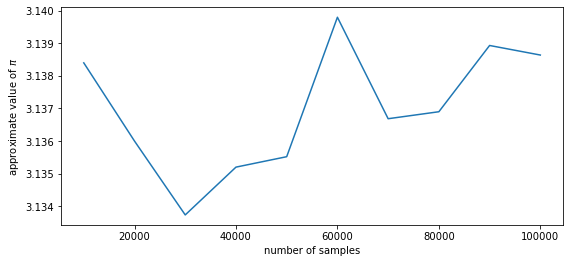

In [2]:
radius = 1
n = 1e5
n_samples = 0
n_c = 0

pi_vals = []
n_vals = []

while n_samples < n:
    x = 2 * np.random.rand() - 1
    y = 2 * np.random.rand() - 1
    n_samples += 1
    if x**2 + y**2 < radius**2:
        n_c += 1
    approx_pi = 4 * n_c / n_samples
    if n_samples % 10000 == 0:
        print("After", n_samples, "samples our approximation of \u03C0 is", approx_pi)
    if n_samples % 10000 == 0:
        pi_vals.append(approx_pi)
        n_vals.append(n_samples)
        
fig = plt.figure(figsize=(9,4))
plt.plot(n_vals, pi_vals)
plt.xlabel('number of samples')
plt.ylabel('approximate value of $\pi$')
plt.show()

Notice that as `n_samples` (the equivalent of $N$ from above) increases, the approximation generally gets closer to the actual value of $\pi$.

Please run the code block above several times and notice that you get a different final approximation value each time!  This is because the sampling process is **random**.  When I run the code several times with $10^5$ samples, the approximation is surprisingly unstable!

Change the block of code above to perform $10^7$ samples.  Is your final value a better or worse approximation?  On average it should be better!

#### Warm-up problem

Tinker with the code above to determine how many samples are necessary to *reliably* give you an approximation accurate to 5 digits.

In [3]:
## warm-up code goes here

***

To reiterate, the above example is a situation where we want to know approximate the value of a quantitiy that *has a specific value*.  $\pi$ is a well defined quantitiy!  Next, we'll apply the MC method to better understand a semi-complex system in which the interaction of several non-deterministic agents makes understanding outcomes very complicated.

***

## Live example: Simulating a multi-agent, non-deterministic system

In this example, we'll use random number generation to simulate the behavior of a turn-based strategy role-playing game to form a statistical understanding of the game's outcomes.

### Our system

Two adventurers, Alcamriel (A) Beladrinian (B) encounter a Vampiric Illithid (V) in the Underdark.  (I have now exhausted all of my D&D knowledge.  What follows will be a very simplified model of battle.)

A begins battle with 260 HP.  B begins battle with 290 HP.  V begins battle with 345 HP.  In each round of battle, the charaters take successive turns attacking their foes: V attacks either A or B; A and B attack V.  Each character's attacks follow the rules below:

- A does random damage between 10 and 20 with a 20\% change of missing
- B does random damage between 15 and 25 with a 35\% chance of missing
- V attacks A or B with equal probability, does random damage between 60 and 100 with a 45\% chance of missing

Each attack's damage decreases the oppononent's HP, and when a character's HP reaches zero they are... ya know, done battling.  While the individual character's actions are important, **it is the interaction between these multiple agents that determines the outcome of the battle.**  

What are the chances that our heroes (A and B) will win this battle?  This is a tricky question, and answering it gets into all kinds of tricky philosophical territory about interpretations of probability and statistics...  We're not going to go there.

### Simulating attacks

Let's first act this out in real time.  We need volunteers for A, B, and V.  We'll also need a Dungeon Master to keep track of turns and HP.

In a normal role-playing game the randomness of attacks and damage would be determined by dice rolls.  We will use code in the cell below to simulate the characters' attacks for each turn.

In [4]:
## character A
strike_A = np.random.rand()
damage_A = 0
if strike_A > 0.20:
    damage_A = np.random.randint(10, 21)
    print("A deals", damage_A, "damage to V")
else:
    print("A misses!")
    
## character B
strike_B = np.random.rand()
damage_B = 0
if strike_B > 0.35:
    damage_B = np.random.randint(15, 26)
    print("B deals", damage_B, "damage to V")
else:
    print("B misses!")
    
## character V
target = np.random.choice(['A', 'B'])
out_text = ''
out_text += "V attacks " + target + "..."
strike_V = np.random.rand()
damage_V = 0
if strike_V > 0.45:
    damage_V = np.random.randint(60, 100)
    out_text += " dealing " + str(damage_V) + " damage!"
else:
    out_text += " but misses!"
print(out_text)

A misses!
B deals 21 damage to V
V attacks A... dealing 88 damage!


***

Playing through a few battles, you can see that the outcomes are pretty unstable!  The code above provides the machinery for performing a battle, but it doesn't provide us with any **high-level understanding** of battle.  For example, if we are A or B, there are many questions that we might wish to know *before* we engage the Vampiric Illithid in battle:
- What is the average damage done by A per turn?  B?
- What is the probability that we can vanquish V?
- What is the probability that A will survive battle?  B?
- What is the probability that only A or B will survive batte?  Both?
- How long (on average) does a battle last?  How many turns will each character take?

A few of these may be easy to answer (the first one) because they don't rely on the *interaction* of the agents.  However, the other questions are difficult because of the interaction!

#### Simulating a battle

Let's now build a simulation of a single battle that uses the attack rules above.  We will essentially be adding code to play the role of the Dungeon Master.

In [5]:
## battle code goes here.

***

Great!  (I am assuming that worked.)  The outcome of the code above is the result of a **single** battle.  Because the actions of the agents in the battle is random, this will NOT suffice as a statistical understanding of the risks involved in engaging V!  

In the lingo of Monte Carlo, the simulated battle above is merely a **single sampling** of the behavior of the system.  To really do a MC analysis, we need to simulate **many** individual battles and aggregate the results.

#### Approximating statistical quantities by simulaing **many** battles

So, as our last step, let's simulate 1000 battles and calculate the fraction of times that V is victorious.  (Afterall, if A or B survive they can always cast a revivify spell on any deceased allies, duhhhhhhhh.)

In [6]:
## MC analysis code goes here

***

## Problems 

Your homework is to complete three (3) of the following problems.

### Regulars

1. Perform a Monte Carlo analysis to estimate the probablility that in a group of 20 people, at least two people share a birthday.  Assume that births are equally likely on all dates.  You can ignore leap years.
1. The `numpy.random.normal()` function generates random numbers from a gaussian/normal/bell-curve distribution.  The snippet `std_dev * numpy.random.normal() + mean` will generate a random value from a gaussian distribution with supplied values of standard deviation (`std_dev`) and mean.  Assume that the mean and standard deviations for heights of Icelandic women are 168 cm and 8.0 cm, respectively.  Perform a Monte Carlo simulation to estimate the probability that a randomly-chosen group 5 Icelandic women will include at least three that are taller than 180 cm.
1. You are a casino owner.  You love to take people's money, but you are dissatisfied by how complicated most casino games are.  You design a simple game in which a player rolls 5 six-sided dice, and gets a score by adding the three largest values (discarding the two lower values).  If the player's score is over some threshhold value $S$, they win!  Perform a Monte Carlo analysis to estimate the average score in this game.  Next determine what you should set $S$ to be such that players will win about 30\% of attempts.

### Meanies

4. The [Bradley-Terry model](https://en.wikipedia.org/wiki/Bradley%E2%80%93Terry_model) gives a simple way to model the outcome of a contest between two players or teams.  We'll simplify it further by stating the model in the followin way: If teams A and B have previous win percentages $p_A$ and $p_B$, respectively, then the probability that A will defeat B in a contest is 
\begin{equation}
\textrm{Pr}(\textrm{A defeats B}) = \frac{p_A}{p_A + p_B}
\end{equation}
Assume that a sports league has four teams, A through D, with previous win percentages 0.45, 0.5, 0.5, and 0.6, respectively.  During the season, each team plays every other 4 times.  Perform a Monte Carlo analysis to estimate the probability that the worst team ends the season with the largest number of wins.  How is this probability affected if the teams are matched 8 times during the season?
4. You stand before an infinitely large horizontal plane, upon which are drawn parallel lines spaced a distance $\ell$ apart.  You drop a needle with length $\ell$ onto the plane.  The needle's position and orientation once it comes to rest are random and uncorrelated.  Use a Monte Carlo simulation to determine the probability that the needle lands such it crosses one of the lines.  (Hint: Your plane probably doesn't need to be infinitely large in the simulation.)
